In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'bike_details.csv' with the actual file path)
df = pd.read_csv('BIKE DETAILS.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
None
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Ya

In [2]:
# 1. What is the range of selling prices in the dataset
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"Range of selling prices: {min_price} - {max_price}")


Range of selling prices: 5000 - 760000


In [3]:
# 2. What is the median selling price for bikes in the dataset
median_price = df['selling_price'].median()
print(f"Median selling price: {median_price}")


Median selling price: 45000.0


In [4]:
# 3.  What is the most common seller type
most_common_seller = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller}")


Most common seller type: Individual


In [5]:
# 4.  How many bikes have driven more than 50,000 kilometers
high_km_bikes = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 km: {high_km_bikes}")


Number of bikes driven more than 50,000 km: 170


In [6]:
# 5.  What is the average km_driven value for each ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km driven by ownership type:\n", avg_km_by_owner)


Average km driven by ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
# 6.  What proportion of bikes are from the year 2015 or older
year_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = year_2015_or_older / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2%}")


Proportion of bikes from 2015 or older: 56.64%


In [8]:
# 7.  What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [9]:
# 8.  What is the highest ex_showroom_price recorded, and for which bike
highest_ex_price = df['ex_showroom_price'].max()
highest_ex_bike = df[df['ex_showroom_price'] == highest_ex_price]['name'].values[0]
print(f"Highest ex-showroom price: {highest_ex_price} (Bike: {highest_ex_bike})")


Highest ex-showroom price: 1278000.0 (Bike: Harley-Davidson Street Bob)


In [10]:
# 9.  What is the total number of bikes listed by each seller type
seller_counts = df['seller_type'].value_counts()
print("Total number of bikes by seller type:\n", seller_counts)


Total number of bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


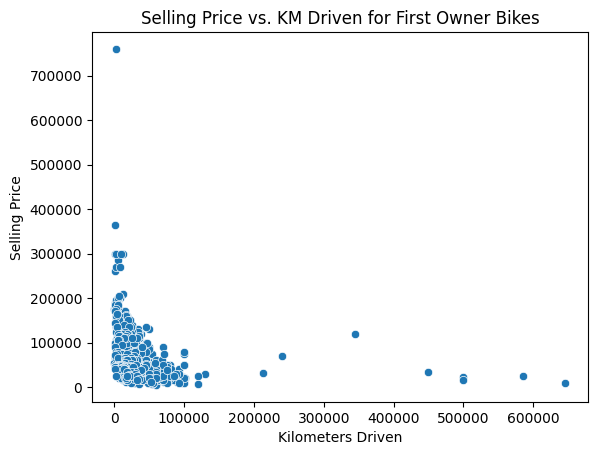

In [11]:
# 10.  What is the relationship between selling_price and km_driven for first-owner bikes
sns.scatterplot(x=df[df['owner'] == '1st owner']['km_driven'],
                y=df[df['owner'] == '1st owner']['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. KM Driven for First Owner Bikes')
plt.show()


In [12]:
# 11.  Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Number of records after removing outliers: {df_no_outliers.shape[0]}")


Number of records after removing outliers: 1022


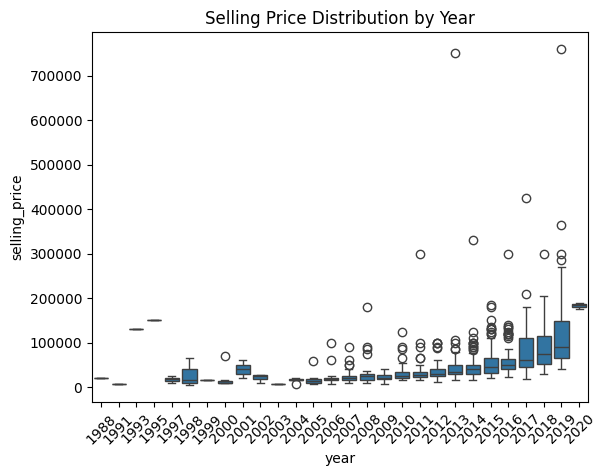

In [13]:
# 12.  Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title('Selling Price Distribution by Year')
plt.show()


In [14]:
# 13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
current_year = 2025
df['bike_age'] = current_year - df['year']
avg_depreciation = df.groupby('bike_age')['selling_price'].mean()
print("Average depreciation in selling price by bike age:\n", avg_depreciation)


Average depreciation in selling price by bike age:
 bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [15]:
# 14.  Which bike names are priced significantly above the average price for their manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['above_avg_price'] = df.apply(lambda x: x['selling_price'] > avg_price_by_year[x['year']], axis=1)
expensive_bikes = df[df['above_avg_price']]
print("Bikes priced significantly above average for their manufacturing year:\n", expensive_bikes[['name', 'year', 'selling_price']])


Bikes priced significantly above average for their manufacturing year:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


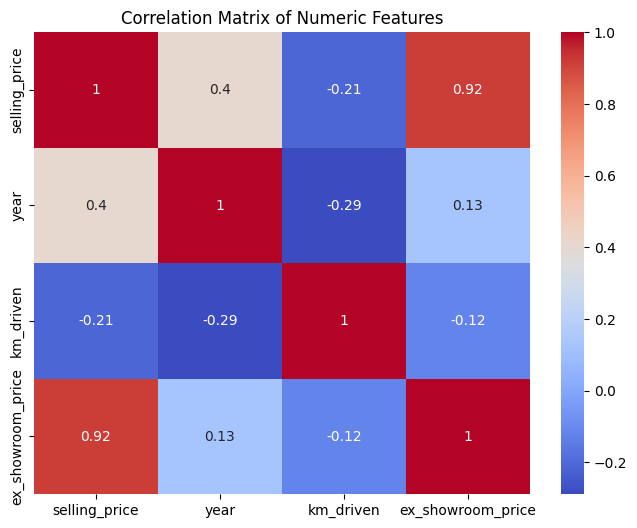

In [16]:
# 15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()
